# Clustering with K-Means Algorithms

### By Wilson Peguero Rosario

## Assignment Description
Clustering is an unsupervised machine learning method used for grouping similar data in datasets so it can be easily understood and manipulated. One such algorithm, k-means, takes data and learns how it can be grouped. Some real-world examples of its use include fake news identification, fantasy league stat analysis, insurance fraud detection, or customer/market segmentation.

To perform a k-means analysis using the k-means algorithm, complete the following:

1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.
2. Ensure that the datasets are suitable for clustering using these methods.
3. You may search for data in other repositories, such as Data.gov or Kaggle.

For your selected datasets, build a K-means clustering model.

1. Start by choosing the number of clusters. Discuss how you would find the optimal number of clusters that best fits the dataset.
    - *Finding the optimal number of clusters can be done through either the elbow method or the silhouette method. Although they are both valuable to interpreting the data set and it's subgroups, the number clusters can be ideally determined by using the elbow method. The silhouette method works great as a confirmation to the number of clusters chosen.*
2. Randomly pick k centroids "not necessarily from your dataset" (or points that will be the center of your clusters) in d-space. Try to make them near the data but different from one another.
    - *In hindsight, the algorithm will select the ideal number of clusters at random*
3. Assign each data point to the closest centroid. This will form your k clusters. Apply the Euclidian distance to form your clusters.
4. Move the centroids to the average location of the data points assigned to it.
5. Repeat the preceding two steps until the assignments do not change or change very little.

**Note**: A key objective is to minimize the variation within the clusters defined as **the sum of squared Euclidean distances between items and the corresponding centroid**.

1. Explain the dataset and the type of information you wish to gain by applying a clustering method.
2. Explain the k-means algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., outliers); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by performing a clustering analysis using the k-means.
6. Use the elbow method to find the optimal number of clusters for your chosen dataset. Justify your chosen (final) value of k.
7. Perform k-means analysis. Explain the intuition behind each mathematical step.
8. Interpret the results in the context of the questions you asked.
9. Discuss how you minimized the variation within the clusters.
10. Validate your model. Then, explain the results.
11. Include all mathematical formulas used and graphs representing the final outcomes.

Prepare a comprehensive technical report as a markdown document or Jupyter notebook, including all code, code comments, all outputs, plots, and analysis. Make sure the project documentation contains a) problem statement, b) algorithm of the solution, c) analysis of the findings, and d) references.

#### Preliminary adjustments

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,30)

## Solution

### Problem Statement
Analyzing the 
### Data Processing

In [12]:
import random
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

df__frog_calls = pd.read_csv(r'frog_calls/Frogs_MFCCs.csv')
df__frog_calls.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,Adenomera,AdenomeraAndre,1
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1


Now that the data set has been loaded, one is able to view that majority of the features that can be utilized for classification are numerical in nature. Creating a matrix of scatterplots to view the association between the numerical values may assist in determining the relationship between the explanatory variables.

array([[<AxesSubplot:xlabel='MFCCs_ 1', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 2', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 3', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 4', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 5', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 6', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 7', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 8', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 9', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_10', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_11', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_12', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_13', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_14', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_15', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_16', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_17', 

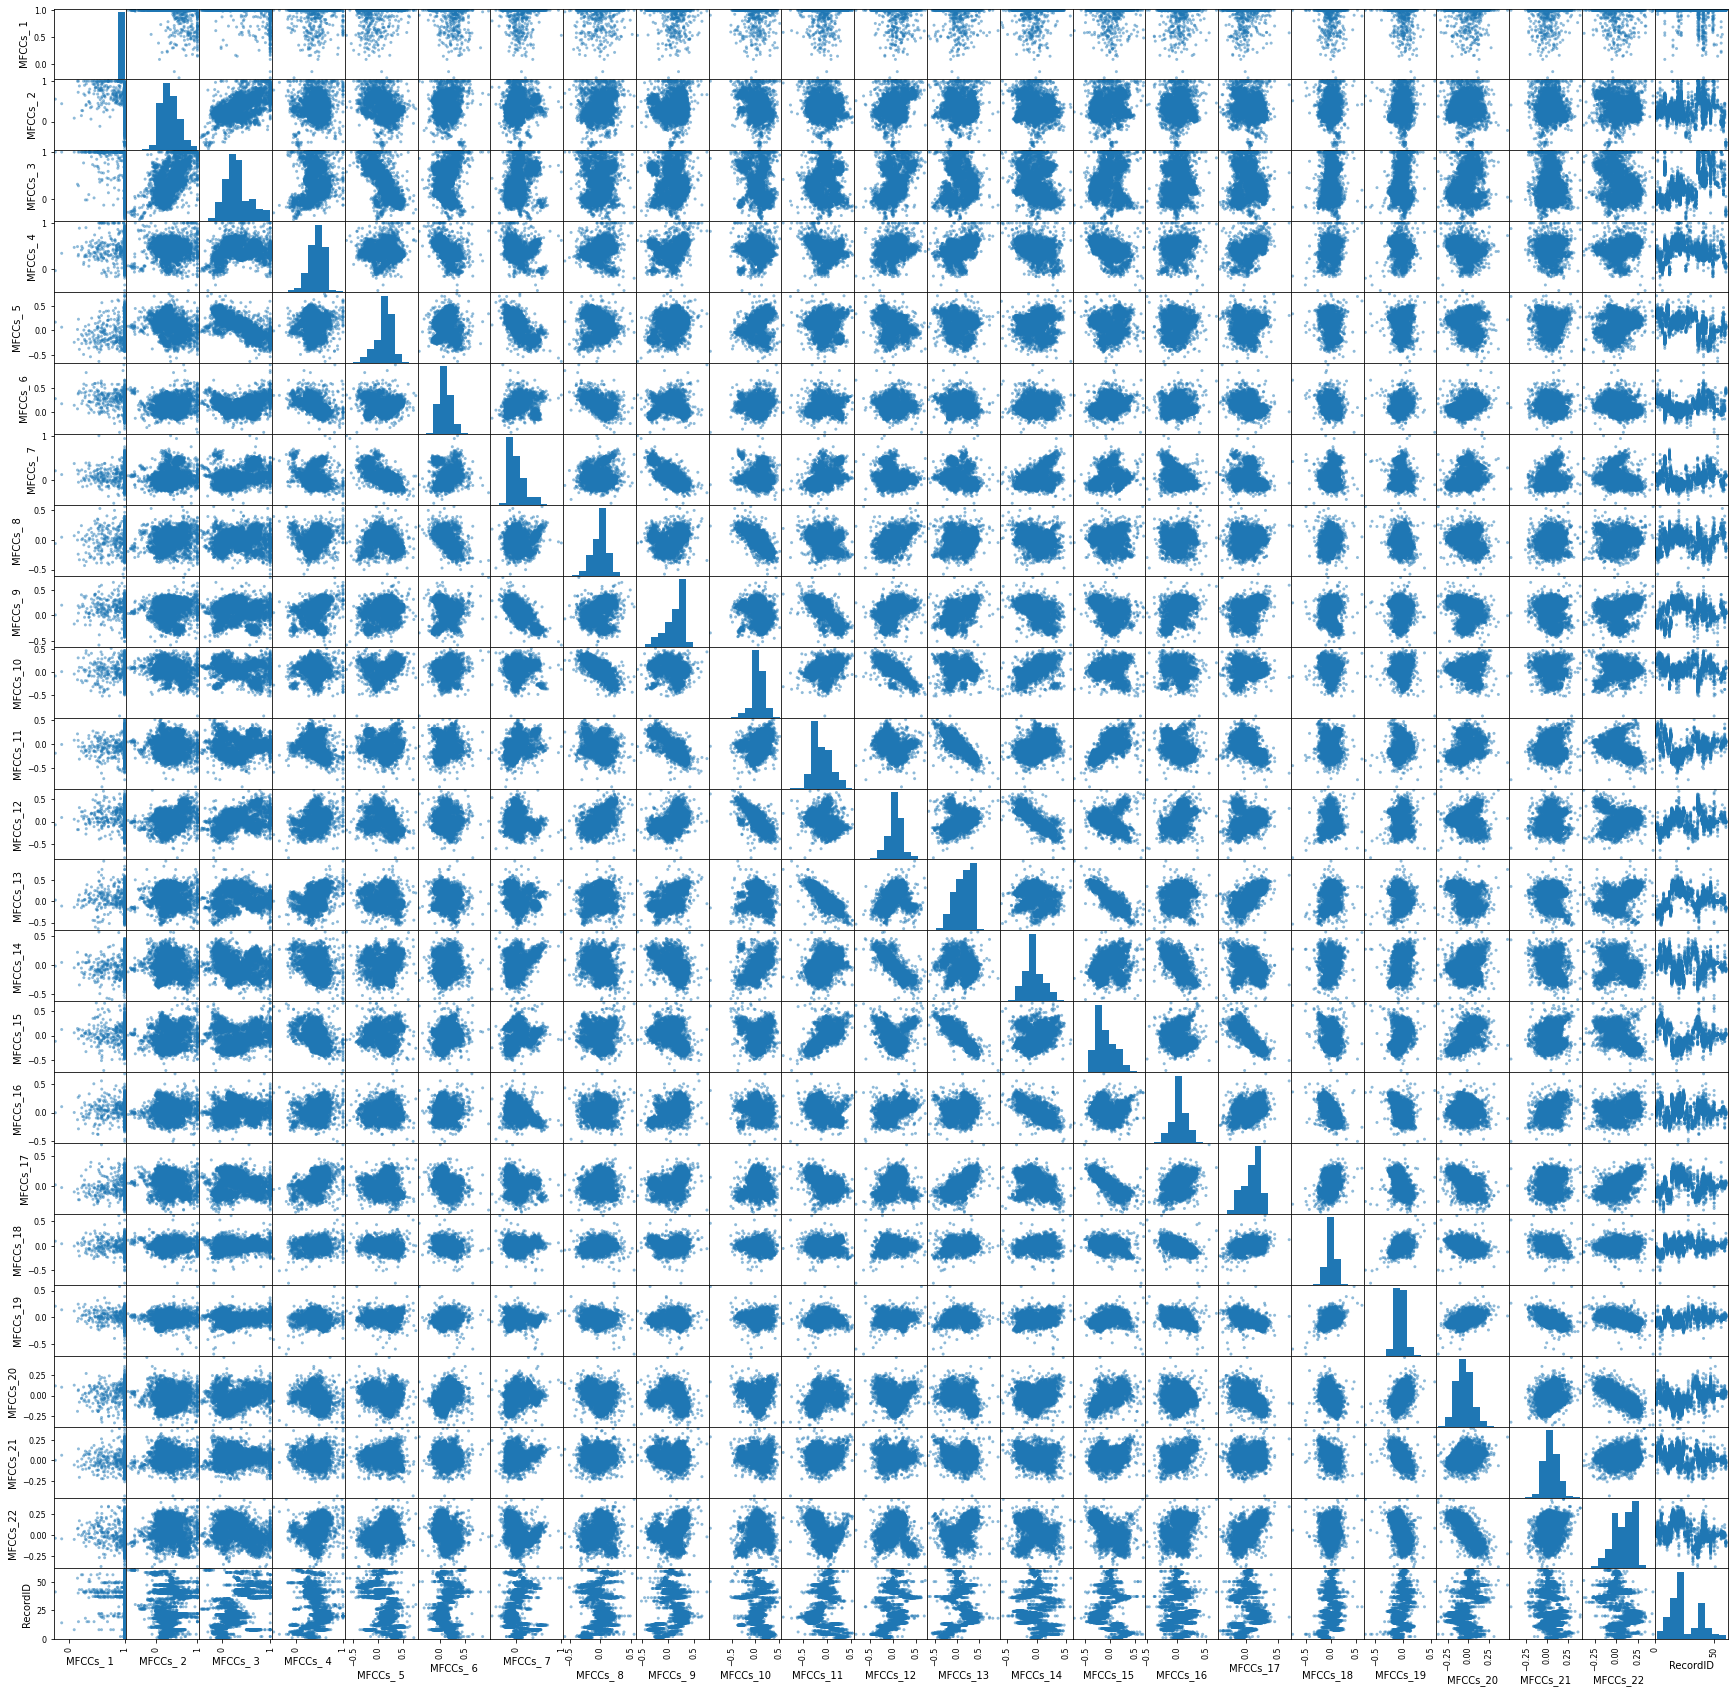

In [13]:
pd.plotting.scatter_matrix(df__frog_calls)

An observation of the correlation matrix allows one to view the following relationship between the explanatory variables.

In [14]:
corr_matrix = df__frog_calls.corr()
corr_matrix\
    .style\
        .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)\
            .format(precision=2)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
MFCCs_ 1,1.00,-0.26,-0.31,0.02,0.19,-0.22,-0.07,0.04,-0.00,0.05,-0.02,-0.05,0.07,0.01,-0.10,0.01,0.12,-0.00,-0.14,-0.09,0.07,0.08,-0.14
MFCCs_ 2,-0.26,1.00,0.61,-0.04,-0.42,0.05,0.23,0.23,-0.04,-0.23,0.06,0.13,-0.17,-0.01,0.27,-0.06,-0.27,0.05,0.20,0.13,-0.04,-0.20,0.06
MFCCs_ 3,-0.31,0.61,1.00,0.03,-0.76,0.18,0.44,0.04,-0.19,-0.19,0.21,0.25,-0.18,-0.09,0.21,-0.02,-0.19,0.07,0.23,0.34,-0.06,-0.41,0.49
MFCCs_ 4,0.02,-0.04,0.03,1.00,0.17,-0.61,-0.40,0.32,0.45,-0.10,-0.45,0.31,0.52,-0.37,-0.54,0.25,0.55,0.11,-0.38,-0.41,0.23,0.46,-0.27
MFCCs_ 5,0.19,-0.42,-0.76,0.17,1.00,-0.12,-0.70,-0.07,0.38,0.15,-0.24,-0.07,0.17,-0.11,-0.19,0.20,0.18,-0.14,-0.15,-0.29,-0.02,0.37,-0.34
MFCCs_ 6,-0.22,0.05,0.18,-0.61,-0.12,1.00,0.32,-0.60,-0.29,0.18,0.31,-0.15,-0.36,0.16,0.40,-0.07,-0.44,-0.23,0.35,0.46,-0.17,-0.44,0.39
MFCCs_ 7,-0.07,0.23,0.44,-0.40,-0.70,0.32,1.00,-0.12,-0.81,0.09,0.62,-0.33,-0.47,0.49,0.42,-0.46,-0.40,0.11,0.23,0.42,-0.03,-0.50,0.16
MFCCs_ 8,0.04,0.23,0.04,0.32,-0.07,-0.60,-0.12,1.00,0.34,-0.67,-0.34,0.42,0.23,-0.26,-0.15,0.11,0.17,0.13,-0.24,-0.29,0.19,0.25,-0.19
MFCCs_ 9,-0.00,-0.04,-0.19,0.45,0.38,-0.29,-0.81,0.34,1.00,-0.22,-0.85,0.45,0.67,-0.55,-0.54,0.50,0.49,-0.10,-0.27,-0.43,0.04,0.52,-0.05
MFCCs_10,0.05,-0.23,-0.19,-0.10,0.15,0.18,0.09,-0.67,-0.22,1.00,0.26,-0.75,-0.09,0.52,-0.01,-0.27,0.01,0.04,0.07,0.02,-0.16,-0.01,-0.12
